In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('report.csv')
#print(df)

In [3]:
def plot(df, cond, label, var='exec'):
    if cond is None:
        _df = df
    else:
        _df = df[cond]
    n_qubits = _df['qubits']
    exec_time = _df[var]
    plt.plot(n_qubits, exec_time, label=label)

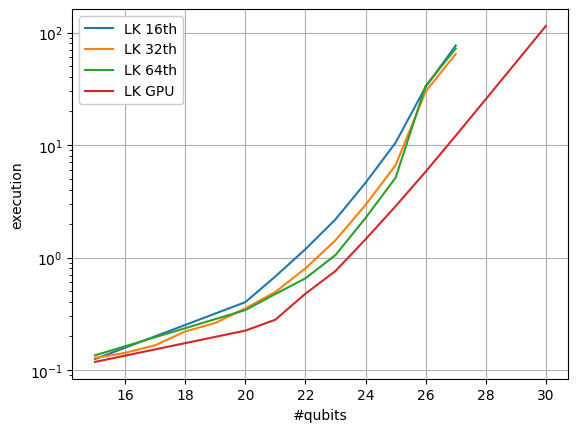

In [4]:
df_LK_CPU = df[(df['dev'] == 'lightning.kokkos') & (df['jit'] == '-') & (df['hw'] == 'CPU')]
df_LK_GPU = df[(df['dev'] == 'lightning.kokkos') & (df['jit'] == '-') & (df['hw'] == 'GPU')]

plot(df_LK_CPU, (df_LK_CPU['threads'] == 16), 'LK 16th')
plot(df_LK_CPU, (df_LK_CPU['threads'] == 32), 'LK 32th')
plot(df_LK_CPU, (df_LK_CPU['threads'] == 64), 'LK 64th')
plot(df_LK_GPU, None, 'LK GPU')
plt.ylabel('execution')

plt.xlabel('#qubits')
plt.yscale('log')
plt.grid()
plt.legend(framealpha=1)

plt.savefig('LK_CPU-vs-GPU.png')
plt.show()

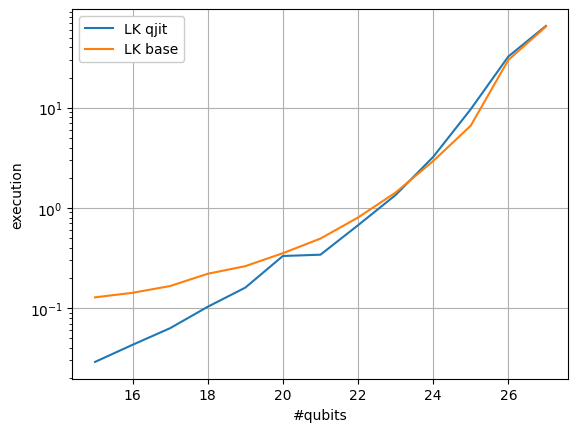

In [5]:
df_LK = df[(df['dev'] == 'lightning.kokkos') & (df['threads'] == 32) & (df['hw'] == 'CPU')]

plot(df_LK, (df_LK['jit'] == 'qjit'), 'LK qjit')
plot(df_LK, (df_LK['jit'] == '-'), 'LK base')
plt.ylabel('execution')

plt.xlabel('#qubits')
plt.yscale('log')
plt.grid()
plt.legend(framealpha=1)

plt.savefig('LK_qjit-vs-base.png')
plt.show()

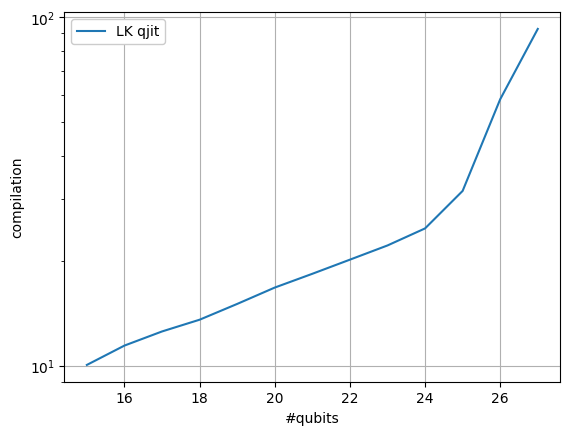

In [6]:
df_LK = df[(df['dev'] == 'lightning.kokkos') & (df['threads'] == 32) & (df['hw'] == 'CPU')]

plot(df_LK, (df_LK['jit'] == 'qjit'), 'LK qjit', 'comp')
plt.ylabel('compilation')

plt.xlabel('#qubits')
plt.yscale('log')
plt.grid()
plt.legend(framealpha=1)

plt.savefig('LK_qjit-compile.png')
plt.show()